In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# Q1 
# Handling Missing Values
# Fill missing values in the age column with the mean value of that column

student_data = pd.read_csv('../datasets/student_data - Sheet1.csv')
print('Original data:')
print(student_data)

student_data['age'].fillna(student_data['age'].mean(), inplace=True)
print('\nResult:')
print(student_data)

Original data:
   id             name   age grade       address
0   1         John Doe  20.0     A   123 Main St
1   2       Jane Smith  22.0     B    456 Oak St
2   3      Emily Davis   NaN     A   789 Pine St
3   4  Michael Johnson  23.0     C  321 Maple St
4   5    Jessica Brown  23.0     B    654 Elm St
5   6  Michael Johnson  23.0     C  321 Maple St
6   7         John Doe  20.0     A   123 Main St
7   8      Emma Wilson  24.0     B  987 Birch St
8   9         John Doe   NaN     A   123 Main St

Result:
   id             name        age grade       address
0   1         John Doe  20.000000     A   123 Main St
1   2       Jane Smith  22.000000     B    456 Oak St
2   3      Emily Davis  22.142857     A   789 Pine St
3   4  Michael Johnson  23.000000     C  321 Maple St
4   5    Jessica Brown  23.000000     B    654 Elm St
5   6  Michael Johnson  23.000000     C  321 Maple St
6   7         John Doe  20.000000     A   123 Main St
7   8      Emma Wilson  24.000000     B  987 Birch St


C:\Users\gabri\AppData\Local\Temp\ipykernel_22664\1757179500.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data['age'].fillna(student_data['age'].mean(), inplace=True)


In [11]:
# Q2
# Removing Duplicate Rows
# Write a python script to remove any duplicate row from student_data

student_data.drop_duplicates(subset=['name'], inplace=True)
print(student_data)

   id             name        age grade       address
0   1         John Doe  20.000000     A   123 Main St
1   2       Jane Smith  22.000000     B    456 Oak St
2   3      Emily Davis  22.142857     A   789 Pine St
3   4  Michael Johnson  23.000000     C  321 Maple St
4   5    Jessica Brown  23.000000     B    654 Elm St
7   8      Emma Wilson  24.000000     B  987 Birch St


In [12]:
# Q3 
# Converting Data Types
# Convert the price column in the sales csv file from string to float

sales_data = pd.read_csv('../datasets/sales - Sheet1.csv')
print('Original:')
print(sales_data)

sales_data['price'] = sales_data['price'].replace({' USD': ''}, regex=True).astype(float)
print('\nResult:')
print(sales_data)


Original:
   product_id product_name    price  quantity
0         101        Apple  1.5 USD       100
1         102       Banana  0.8 USD       150
2         103       Orange  1.2 USD       200
3         104   Strawberry  2.5 USD        50
4         105       Grapes    3 USD        75
5         106   Watermelon  500 USD        30
6         107         Pear    2 USD       180
7         108    Pineapple  2.8 USD        90

Result:
   product_id product_name  price  quantity
0         101        Apple    1.5       100
1         102       Banana    0.8       150
2         103       Orange    1.2       200
3         104   Strawberry    2.5        50
4         105       Grapes    3.0        75
5         106   Watermelon  500.0        30
6         107         Pear    2.0       180
7         108    Pineapple    2.8        90


In [13]:
# Q4
# Renaming Columns
# Rename the columns in the employee csv from ["name", "age", "salary"] to ["employee_name", "employee_age", "employee_salary"]

employee_data = pd.read_csv('../datasets/employee_data - Sheet1.csv')
print("Original:")
print(employee_data)

employee_data.rename(columns={'name': 'employee_name', 'age': 'employee_age', 'salary': 'employee_salary'}, inplace=True)
print('\nResult:')
print(employee_data)

Original:
   employee_id           name  age    salary department    status
0            1     John Smith   29   40000.0  Marketing    Active
1            2       Jane Doe   35   50000.0      Sales    Active
2            3  Alice Johnson   30   60000.0         IT  Inactive
3            4  Michael Brown   25       NaN         HR  Inactive
4            5    Sarah White   28   42000.0  Marketing    Active
5            6     John Smith   29   40000.0  Marketing    Active
6            7    David Green   40  150000.0      Sales    Active
7            8  Alice Johnson   30   60000.0         IT  Inactive
8            9  Michael Brown   25       NaN         HR  Inactive

Result:
   employee_id  employee_name  employee_age  employee_salary department  \
0            1     John Smith            29          40000.0  Marketing   
1            2       Jane Doe            35          50000.0      Sales   
2            3  Alice Johnson            30          60000.0         IT   
3            4  Micha

In [14]:
# Q5
# Label Encoding
# Encode the status column of employee_data 
# Active -> 1, Inactive -> 0

employee_data['status'] = employee_data['status'].map({'Active': 1, 'Inactive': 0})
print(employee_data)


   employee_id  employee_name  employee_age  employee_salary department  \
0            1     John Smith            29          40000.0  Marketing   
1            2       Jane Doe            35          50000.0      Sales   
2            3  Alice Johnson            30          60000.0         IT   
3            4  Michael Brown            25              NaN         HR   
4            5    Sarah White            28          42000.0  Marketing   
5            6     John Smith            29          40000.0  Marketing   
6            7    David Green            40         150000.0      Sales   
7            8  Alice Johnson            30          60000.0         IT   
8            9  Michael Brown            25              NaN         HR   

   status  
0       1  
1       1  
2       0  
3       0  
4       1  
5       1  
6       1  
7       0  
8       0  


In [15]:
# Q6
# Dropping Columns
# Drop the address column from student_data

student_data.drop(columns=['address'], inplace=True)
print(student_data)

   id             name        age grade
0   1         John Doe  20.000000     A
1   2       Jane Smith  22.000000     B
2   3      Emily Davis  22.142857     A
3   4  Michael Johnson  23.000000     C
4   5    Jessica Brown  23.000000     B
7   8      Emma Wilson  24.000000     B


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

C:\Users\gabri\AppData\Local\Temp\ipykernel_22664\2919743912.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_22664\2919743912.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

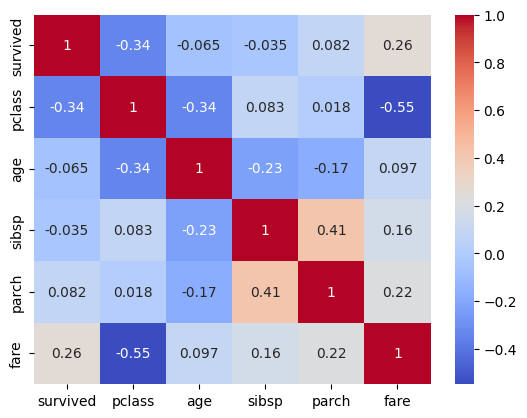

In [16]:
# Q7
# Correlation Heatmap Generation for the Titanic Dataset
# Load the Dataset:
# Handle Missing Values:
# Fill missing values in the age column with the median.
# Fill missing values in the embarked column with the mode.
# Use pandas to generate the correlation matrix for the numerical columns in the dataset. 
# Visualize the correlation matrix using a heatmap from seaborn.

titanic_df = sns.load_dataset('titanic')
print(titanic_df)

titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)
numeric_cols = titanic_df.select_dtypes(include=["number"])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [17]:
# Q8
# Add a Normalized Salary Column for employee data
# Write a python script to 
# Read the dataset into a Pandas DataFrame
# Normalize the salary column using the formula:
# Normalized Salary = (salary - Min Salary) / (Max Salary - Min Salary)
# Add normalized salary column

employee_data['normalized_salary'] = (employee_data['employee_salary'] - employee_data['employee_salary'].min()) / (employee_data['employee_salary'].max() - employee_data['employee_salary'].min())
print(employee_data)

   employee_id  employee_name  employee_age  employee_salary department  \
0            1     John Smith            29          40000.0  Marketing   
1            2       Jane Doe            35          50000.0      Sales   
2            3  Alice Johnson            30          60000.0         IT   
3            4  Michael Brown            25              NaN         HR   
4            5    Sarah White            28          42000.0  Marketing   
5            6     John Smith            29          40000.0  Marketing   
6            7    David Green            40         150000.0      Sales   
7            8  Alice Johnson            30          60000.0         IT   
8            9  Michael Brown            25              NaN         HR   

   status  normalized_salary  
0       1           0.000000  
1       1           0.090909  
2       0           0.181818  
3       0                NaN  
4       1           0.018182  
5       1           0.000000  
6       1           1.000000  
7

In [18]:
# Q9
# Handling Outliers Using Standard Deviation
# Given the employee data that contains salary information.
# Your task is to remove outliers using the standard deviation method (+/- 3).

mean_salary = employee_data['employee_salary'].mean()
std_salary = employee_data['employee_salary'].std()
employee_data_no_outliers = employee_data[
    (employee_data['employee_salary'] >= mean_salary - 3 * std_salary) & 
    (employee_data['employee_salary'] <= mean_salary + 3 * std_salary)]

print(employee_data_no_outliers)

   employee_id  employee_name  employee_age  employee_salary department  \
0            1     John Smith            29          40000.0  Marketing   
1            2       Jane Doe            35          50000.0      Sales   
2            3  Alice Johnson            30          60000.0         IT   
4            5    Sarah White            28          42000.0  Marketing   
5            6     John Smith            29          40000.0  Marketing   
6            7    David Green            40         150000.0      Sales   
7            8  Alice Johnson            30          60000.0         IT   

   status  normalized_salary  
0       1           0.000000  
1       1           0.090909  
2       0           0.181818  
4       1           0.018182  
5       1           0.000000  
6       1           1.000000  
7       0           0.181818  


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000018BAB34F970>>


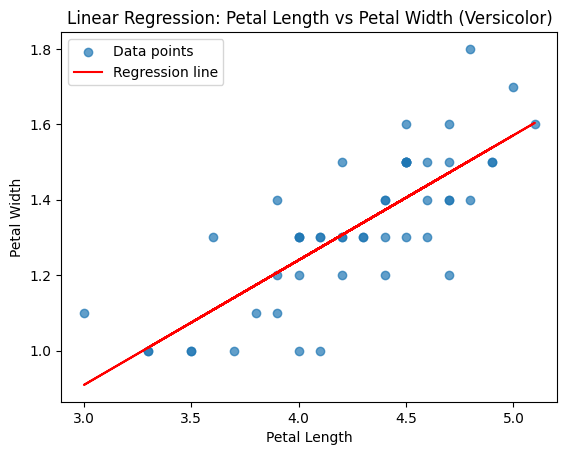

In [19]:
# Q10
# Linear Regression
# Import the iris dataset and perform linear reression to model the 
# relationship between petal length and petal width for the versicolor species.

iris = sns.load_dataset('iris')

versicolor = iris[iris['species'] == 'versicolor']
model = smf.ols(formula="petal_width ~ petal_length", data=versicolor).fit()
print(model.summary)

plt.scatter(
    versicolor["petal_length"],
    versicolor["petal_width"],
    alpha=0.7,
    label="Data points"
)

x_vals = versicolor["petal_length"]
y_vals = model.predict(versicolor)

plt.plot(x_vals, y_vals, color="red", label="Regression line")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Linear Regression: Petal Length vs Petal Width (Versicolor)")
plt.legend()
plt.show()
